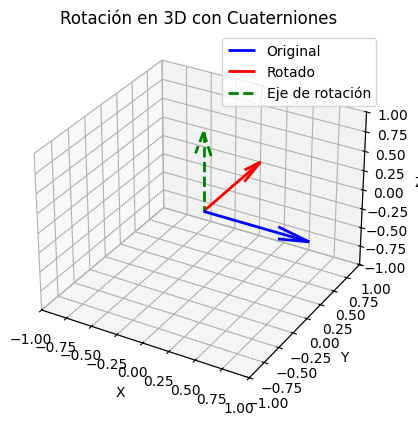

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- Funciones de cuaterniones ---

def quaternion_mult(q1, q2):
    w1, x1, y1, z1 = q1
    w2, x2, y2, z2 = q2
    return np.array([
        w1*w2 - x1*x2 - y1*y2 - z1*z2,
        w1*x2 + x1*w2 + y1*z2 - z1*y2,
        w1*y2 - x1*z2 + y1*w2 + z1*x2,
        w1*z2 + x1*y2 - y1*x2 + z1*w2
    ])

def quaternion_conjugate(q):
    w, x, y, z = q
    return np.array([w, -x, -y, -z])

def rotate_vector(v, axis, angle_rad):
    axis = axis / np.linalg.norm(axis)
    sin_half = np.sin(angle_rad / 2)
    q = np.concatenate([[np.cos(angle_rad / 2)], axis * sin_half])
    q_conj = quaternion_conjugate(q)
    v_q = np.concatenate([[0], v])
    v_rot_q = quaternion_mult(quaternion_mult(q, v_q), q_conj)
    return v_rot_q[1:]

# --- Visualización ---

def plot_rotation_3d(original, rotated, axis):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Vector original (azul)
    ax.quiver(0, 0, 0, *original, color='blue', label='Original', linewidth=2)

    # Vector rotado (rojo)
    ax.quiver(0, 0, 0, *rotated, color='red', label='Rotado', linewidth=2)

    # Eje de rotación (verde)
    axis_unit = axis / np.linalg.norm(axis)
    ax.quiver(0, 0, 0, *axis_unit, color='green', label='Eje de rotación', linestyle='dashed', linewidth=2)

    # Rango de ejes
    max_range = np.max(np.abs([original, rotated, axis_unit]))
    ax.set_xlim([-max_range, max_range])
    ax.set_ylim([-max_range, max_range])
    ax.set_zlim([-max_range, max_range])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    ax.set_title("Rotación en 3D con Cuaterniones")
    plt.show()

# --- Ejemplo de uso ---

v = np.array([1, 0, 0])                      # vector a rotar
axis = np.array([0, 0, 1])                   # eje Z
angle_rad = np.radians(90)                   # 90 grados

v_rot = rotate_vector(v, axis, angle_rad)
v_2rot = rotate_vector(v_rot,np.array([0,1,0]), np.radians(45))


plot_rotation_3d(v, v_2rot, axis)


In [17]:
v_rot

array([2.22044605e-16, 1.00000000e+00, 0.00000000e+00])

In [15]:
v_2rot

array([ 1.57009246e-16,  1.00000000e+00, -1.57009246e-16])